In [1]:
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn_data = pd.read_csv('datasets/Churn_Modelling.csv')
churn_data.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
columns = churn_data.columns.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [5]:
rows, columns = churn_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 10000
Number of columns: 14


In [6]:
clean_churn_data = churn_data.drop(columns=['RowNumber','CustomerId','Surname'])
clean_churn_data = clean_churn_data.dropna()
clean_churn_data = clean_churn_data.drop_duplicates()
clean_churn_data.head()



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
rows, columns = clean_churn_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 10000
Number of columns: 11


In [8]:
# Identify numerical columns
numerical_cols = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age']

# Normalize the numerical columns
scaler = StandardScaler()
clean_churn_data[numerical_cols] = scaler.fit_transform(clean_churn_data[numerical_cols])
clean_churn_data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [9]:
label_encoder = LabelEncoder()

for column in clean_churn_data.select_dtypes(include=['object']).columns:
    clean_churn_data[column] = label_encoder.fit_transform(clean_churn_data[column])

clean_churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


In [10]:
X = clean_churn_data.drop(columns=['Exited'])
y = clean_churn_data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
value_counts = clean_churn_data['Exited'].value_counts()
print(f"Unique values in Exited column: {value_counts}")

Unique values in Exited column: Exited
0    7963
1    2037
Name: count, dtype: int64


In [12]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [13]:
k_values = list(range(2, 21))  # k values from 2 to 20
mean_scores = []

# Cross-validation to evaluate performance for each k
for k in k_values:
    cv_scores = cross_val_score(model, X, y, cv=k)
    mean_scores.append(cv_scores.mean())
    print(f"Mean accuracy for k={k}: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Select the best k (the one with the highest mean accuracy)
best_k = k_values[mean_scores.index(max(mean_scores))]
print(f"\nBest k-value based on mean accuracy: k={best_k}")

# Perform k-fold cross-validation with the best k-value
cv_scores_best_k = cross_val_score(model, X, y, cv=best_k)

# Report cross-validation results for the best k
print(f"\nCross-validation results using best k={best_k}:")
print(f"Mean accuracy: {cv_scores_best_k.mean():.4f} (+/- {cv_scores_best_k.std():.4f})")


Mean accuracy for k=2: 0.6992 (+/- 0.0000)
Mean accuracy for k=3: 0.7023 (+/- 0.0077)
Mean accuracy for k=4: 0.7016 (+/- 0.0099)
Mean accuracy for k=5: 0.7011 (+/- 0.0089)
Mean accuracy for k=6: 0.7006 (+/- 0.0122)
Mean accuracy for k=7: 0.7000 (+/- 0.0133)
Mean accuracy for k=8: 0.7020 (+/- 0.0128)
Mean accuracy for k=9: 0.7007 (+/- 0.0133)
Mean accuracy for k=10: 0.7006 (+/- 0.0122)
Mean accuracy for k=11: 0.7011 (+/- 0.0134)
Mean accuracy for k=12: 0.7014 (+/- 0.0132)
Mean accuracy for k=13: 0.7006 (+/- 0.0162)
Mean accuracy for k=14: 0.7015 (+/- 0.0146)
Mean accuracy for k=15: 0.7017 (+/- 0.0201)
Mean accuracy for k=16: 0.7013 (+/- 0.0189)
Mean accuracy for k=17: 0.7015 (+/- 0.0209)
Mean accuracy for k=18: 0.7020 (+/- 0.0203)
Mean accuracy for k=19: 0.7020 (+/- 0.0219)
Mean accuracy for k=20: 0.7017 (+/- 0.0201)

Best k-value based on mean accuracy: k=3

Cross-validation results using best k=3:
Mean accuracy: 0.7023 (+/- 0.0077)


In [14]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [15]:
print(f"Accuracy: {accuracy}")


Accuracy: 0.7065


In [16]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1607
           1       0.37      0.68      0.48       393

    accuracy                           0.71      2000
   macro avg       0.63      0.70      0.64      2000
weighted avg       0.80      0.71      0.73      2000



In [17]:
print(conf_matrix)

[[1144  463]
 [ 124  269]]


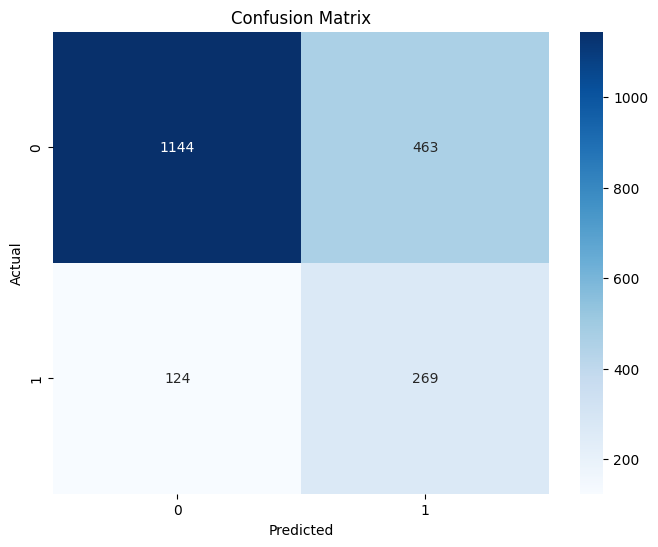

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

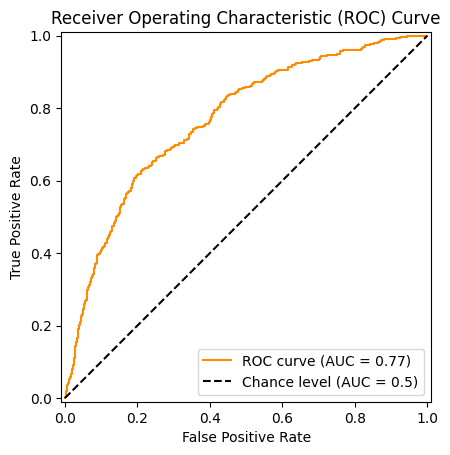

In [19]:
display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_prob,
    name="ROC curve",
    color="darkorange",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Receiver Operating Characteristic (ROC) Curve",
)

plt.show()